## Story 3 - Do stricter gun laws reduce firearm gun deaths?

The CDC publishes firearm mortality for each State per 100,000 persons https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm. Each State' firearm control laws can be categorized as very strict to very lax. The purpose of this Story is to answer the question, "Do stricter firearm control laws help reduce firearm mortality?"
For this assignment you will need to:

- Access the firearm mortality data from the CDC using an available API (https://open.cdc.gov/apis.html)
- Create a 5 point Likert scale categorizing gun control laws from most lax to strictest and assign each state to the most appropriate Likert bin.
- Determine wether stricter gun control laws result in reduced gun violence deaths
- Present your story using  heat maps

### Data Loading

In [1]:
import pandas as pd

firearm_deaths = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story3/firearms-injuries.csv')
giffords_scores = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story3/gifford-gun-law-scorecard.csv')

Gifford's rankings are scored on a scale of A-F, with A being the strictest gun laws and F being the weakest. Let's join these ratings to our gun death rates. 

In [2]:
# change format of 'state' column to match
giffords_scores['state'] = giffords_scores['state'].apply(lambda x: x.upper())

# merge tables
full = firearm_deaths.merge(giffords_scores, on='state', how='inner')

# clean up scores
# remove +/-
# factorize grade
# add numeric grade
full['grade'] = full['grade'].apply(lambda x: x.replace('+', '').replace('-', ''))
full["grade"] = pd.Categorical(full["grade"])

number_grades = pd.DataFrame({"grade": ["A", "B", "C", "D", "F"],
                              "numeric_score": [1, 2, 3, 4, 5]})

full = full.merge(number_grades, on="grade", how="left")

### Visualizations

Using Python's **seaborn** package for visualizations. 

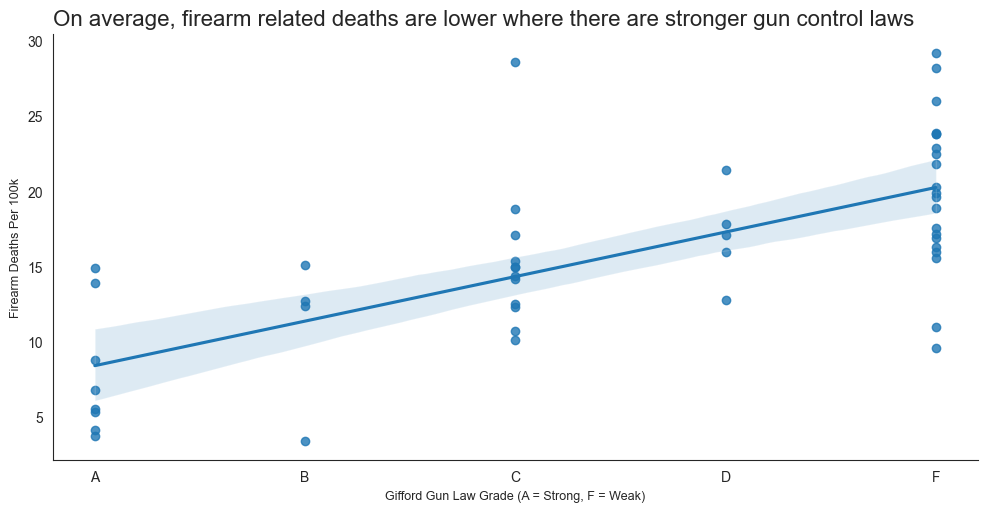

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# set theme
sns.set_style("white")

# regression plot
sns.lmplot(full, x = "numeric_score", y = "deaths_per_100k", height=5, aspect=2)
plt.xticks([1,2,3,4,5], ["A", "B", "C", "D", "F"])
plt.xlabel("Gifford Gun Law Grade (A = Strong, F = Weak)", fontsize=9)
plt.ylabel("Firearm Deaths Per 100k", fontsize=9)
plt.title("On average, firearm related deaths are lower where there are stronger gun control laws", loc="left", fontsize=16)
%matplotlib inline

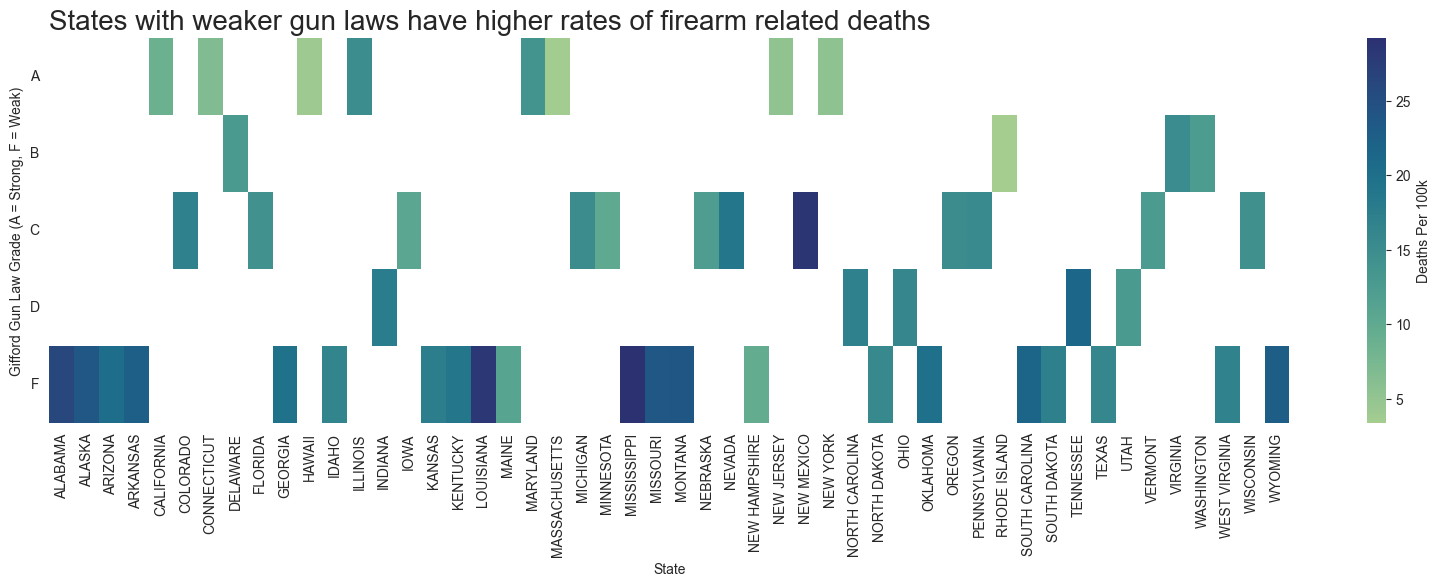

In [7]:
heatmap_data = full.pivot(index="grade", columns="state", values="deaths_per_100k")

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 5))
sns.heatmap(heatmap_data, cmap="crest", cbar_kws={'label': 'Deaths Per 100k'})

# Set axis labels and a title
plt.xlabel('State')
plt.ylabel('Gifford Gun Law Grade (A = Strong, F = Weak)')
plt.title('States with weaker gun laws have higher rates of firearm related deaths', fontsize=20, loc="left")
plt.yticks(rotation=0)

# Show the plot
plt.show()

### Conclusions

Based on the visualizations, stricter gun control does help to reduce firearm mortality. The average rate of firearm mortality inccreases as gun laws get weaker. Also, there are higher rates of mortality in states where there are weaker gun control laws. 